In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [8]:
def multi_gaussian(pos, mu, si):
  n = mu.shape[0]
  Sig_det = np.linalg.det(si)
  Sig_inv = np.linalg.inv(si)
  N = np.sqrt((2*np.pi)**n * Sig_det)
  fac = np.einsum('...k,kl,...l->...', pos-mu, Sig_inv,pos-mu)
  return np.exp(-fac/2)/N

In [9]:
global Gaussian_Matrix
Gaussian_Matrix=[]

In [10]:
def gauss(x,y):
    mu = np.array([x,y])
    Sigma = np.array([[50,0],[0,50]])
    X=np.linspace(0,640,640)
    Y=np.linspace(0,480,480)
    X, Y = np.meshgrid(X,Y)
    # print(X.shape+(2,))
    pos = np.empty(X.shape+(2,))
    pos[:,:,0] = X
    pos[:,:,1] = Y
    Z = multi_gaussian(pos, mu, Sigma)
    # plt.imshow(Z)
    # plt.show()
    Gaussian_Matrix.append(Z)

In [11]:
from tkinter import *
from tkinter import filedialog
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Capture_Events(event,x,y,flags,params):
    if event == cv2.EVENT_LBUTTONDOWN:
        gauss(x,y)

if __name__ == "__main__":
    fln=filedialog.askopenfilename(initialdir=os.getcwd(),title="Select Image File",filetypes=(("ALL FILES","*"),("JPG file","*.jpg"),("PNG file","*.png")))

    img = cv2.imread(fln,1)

    cv2.imshow('image',img)
    cv2.setMouseCallback('image',Capture_Events)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

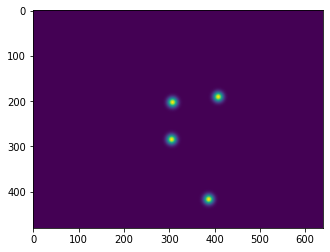

In [12]:
M1M2arr = np.sum(Gaussian_Matrix, axis=0)
cb = plt.imshow(M1M2arr)
plt.show()